### 반도체 데이터로 분류하기

제안서
- 복잡한 현대 반도체 제조 공정은 일반적으로 센서 및/또는 공정 측정 지점에서 된 신호/변수 모니터링을 통해 지속적으로 
- 모든 신호가 특정 모니터링 시스템에서 동등하게 가치가 있는 것
- 측정된 신호에는 유용한 정보, 관련 없는 정보 및 노이즈의 조합
-  각 유형의 신호를 특성으로 간주하면 특성 선택을 적용하여 가장 관련성이은 신호를 식별할 수 잇어야하며 이러한 시혼를 사용하여 프로세스의 다운 스트림 수율 변동에 기여하는 핵심 요소를 결저아가능
- 이를 톨애 프로세스 처리량을 높이고 학습시간을 단축하며 단위당 생산 비용을 줄일 수 있음
- 신호는 수익률 유형을 예측하는 기능으로 사용가능
- 다양한 기능을 조합을 분석하고 시도하여 수율 유형에 영향을 미치는 픽수 신호를 식별 가능
- 특정 프로세스 객체의 합격/불합격 수율을 예측ㅎ고 모델을 구축하는 데 모든 기능이 필요한지 여부를 분석하는 분류기 구축

가공
- 반도체 공정 내 590개 센서 데이터 포함
- 반도체 공정의 예지정비에 초점을 맞춤
- 예지정비란 설비가 완전히 고장나기 전에 비정상 시그널이나 불량 조건 등을 파악하고 해결하며 설비가 전체 중단되는 Downtime을 예방하고자 하는 분석과정
- 이때 불량을 찾아내는건 고난도 작업이며 300mm 웨이퍼에서 설비 문제로 발생하는 아주작은 불량을 찾아내는것은 우리나라 면적에서 100원짜리 동전 한개를 찾는것과 비슷
  - 웨이퍼 : 반도체의 기반으로, 많은 소리를 하나의 칩 안에 직접한 전자부붐인 적접회로가 웨이퍼라는 얇은 기판 위에 다수의 동일 회로를 만들어 반도체 직접회로 탄생됨)
- 기술이 더 발전하면서 회로의 선폭은 더 얇아저 이에 불량을 감지하는 것이 더욱 어려워 짐

- 메모리 반도체는 보통 500여개의 공전, 1000여개의 계측 단계를 거쳐 생산되는데 이 과정에서 설비에 문제가 생길 경우 웨이퍼의 전량을 폐기해야하는 손실이 있음
- 이와같은 문제를 방지하기 위해 반도체 제조 인력의 데이터 분석 직무 능력이 필요해짐
  - 제조 공정 데이터를 엑셀 같은 툴을 이용한 데이터 분석은 매우 제한적이며 코딩능력이 필요함
  - 이에 따라 정형/비정형 데이터분석을 위해 여러 라이브러리가 요구됨
      - 넘파이, 사이파이, 판다스, 맷플롯립, 오픈컴퓨터비전, 웨이브파일 등
      - 데이터 프로세싱 라이브러리
      - 데이터 분석을 위한 AI 라이브러리 활용 요구
- 하지만 이런 데이터 분석의 직무 능력을 위래 언어에 익숙하지 않은 반도체 엔지니어가  파이썬 프로그래밍 언어 학습은 어려우며  특히나 텍스트 코딩 시 발생하는 어려움에 진입 장벽이 높음
- 이에 따라 코딩 플랫폼인 에듀비 확용
  - 클라우드 서비스로 로컬 PC 등에서 복잡한 소프투에어 설치 없이 사용가능
  - 파이썬 명령어와 내장함수의 블록 빛 텍스트 코드 자동 생성 가능
  - 블록으로 부터 생성된 파이썬  코드는 범용적 파이썬 코드로 다른 플랫폼에서도 실행 가능

In [95]:
# 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 모델 생성 및 훈령
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix , plot_confusion_matrix

# 모델 평가 import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

In [82]:
# 데이터 업로드 및 정보
df = pd.read_csv("uci-secom.csv", parse_dates=["Time"])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB
None


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


False

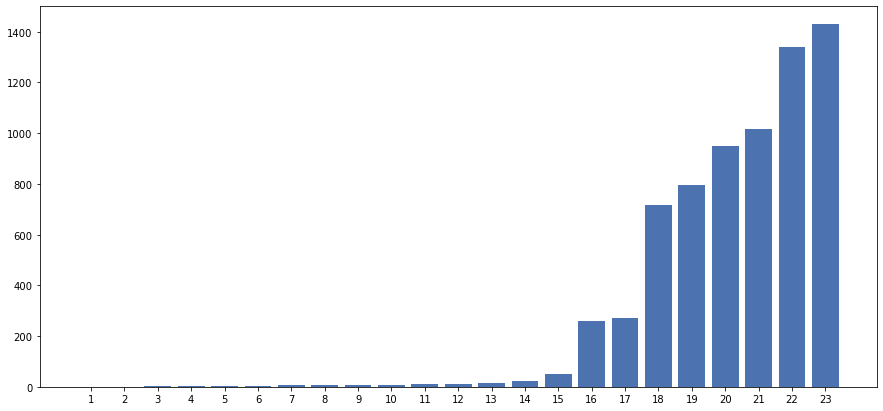

In [83]:
# 가장 많은 센서 데이터 결측치 확인
missing=df.isna().sum()
missing


fig = plt.subplots(figsize=(15,7))

plt.bar(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1), missing.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1));

# 평균으로 결측치처리 - 0으로 채우기
# 신호가 없는걸로 간주하여 0으로 채우는것으로 하여 신호가 없는것으로 가정
df = df.replace(np.NaN, 0)
df.isnull().any().any()

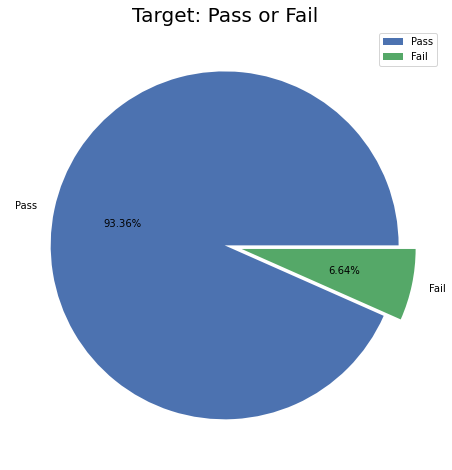

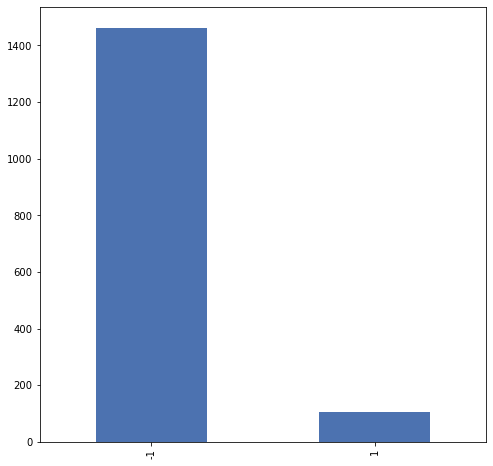

<Figure size 576x576 with 0 Axes>

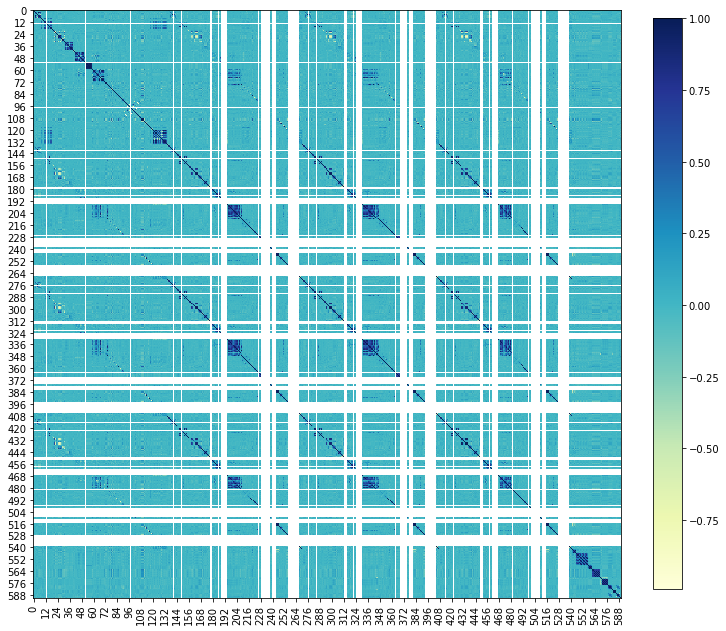

In [84]:
# 파이 그래프
# 불량 분포 보기
labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

# var 차트 1/ -1
df['Pass/Fail'].value_counts().plot(kind="bar");

# 히트맵
corr_matrix = df.corr()
list_df = list(df.columns.values)
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
plt.imshow(corr_matrix, cmap='YlGnBu', interpolation = 'nearest')
plt.xticks(range(0, len(list_df), 12), rotation='vertical')
plt.yticks(range(0, len(list_df), 12))
plt.colorbar(shrink=0.8)
# plt.clim(0.1)
plt.show()

In [85]:
# 상관관계가 높은 일부를 찾음 예측에 도움이 되지 않지만 계산 비용만 증가시키기 때문
# 이상의 예측 변수가 높은 상관도를 가질 경우 공선성이 발생
# 공선성을 피하려면 상관도가 높거나 같은 보고 계층에 존재하는 다수의 변수를 포함 X
def remove_collinear_features(x, threshold):
  # 상관관계
  corr_matrix = x.corr()
  iters = range(len(corr_matrix.columns) - 1)
  drop_cols = []

  # 상관 행렬을 반복하고 상관관계 비교
  for i in iters:
    for j in range(i+1):
      item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
      col = item.columns
      row = item.index
      val = abs(item.values)

      # 임계값 초과하면 drop 리스트에 넣기
      if val >= threshold:
        drop_cols.append(col.values[0])

  # 드랍하기
  drops = set(drop_cols)
  x = x.drop(columns=drops)

  return x
df = remove_collinear_features(df,0.70)

In [87]:
# 필요없는 컬럼 지우기
df = df.drop(columns = ['Time'], axis = 1)
df.shape

(1567, 307)

In [89]:
# x, y 데이터 설정
x_data = df.iloc[:,:306]
y_data = df["Pass/Fail"]

print("shape of x:", x_data.shape)
print("shape of y:", y_data.shape)

# 7:3으로 나누기
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.3, random_state = 1)

shape of x: (1567, 306)
shape of y: (1567,)


In [90]:
# 전처리
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\sumin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9320594479830149


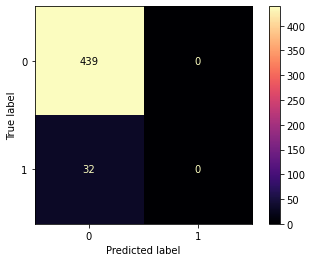

In [104]:
# XGBoost Algorithm
model = XGBClassifier(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (5, 5)
# sns.set(style = 'dark', font_scale = 1.4)
# sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
labels = ['0', '1']
plot = plot_confusion_matrix(model, x_test, y_test, display_labels=labels, cmap='magma', )

print("Accuracy: ", model.score(x_test,y_test))

In [105]:
# plotting the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
model.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (100, 100)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

AttributeError: 'XGBClassifier' object has no attribute 'plot_importance'

## 합치기

In [23]:
# 모델 학습 
# RandomForestClassifier
# KNN
# DecisionTreeClassifier
# SVM

models={"RandomForestClassifier":RandomForestClassifier(),
                "KNN":KNeighborsClassifier(),
                "DecisionTreeClassifier":tree.DecisionTreeClassifier(),
                "svm":svm.SVC()}

In [24]:
# train, test 데이터 나누기
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data)
X_train , X_test, y_train, y_test = train_test_split(scaled_data, y_data, test_size=0.2, random_state=160)

np.random.seed(42)

# 훈련하여 점수 
scores={}
for name,model in models.items():
    clf=model.fit(X_train,y_train)
    scores[name]=clf.score(X_test,y_test)
    
scores

{'RandomForestClassifier': 0.9554140127388535,
 'KNN': 0.9522292993630573,
 'DecisionTreeClassifier': 0.8789808917197452,
 'svm': 0.9554140127388535}

In [25]:
# 최적의 하이퍼파라미터 찾기
rfc_grid={"n_estimators":np.arange(10,2000,10),
                "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                "min_samples_split":np.arange(2,20,2),
                "min_samples_leaf":np.arange(1,10,2),
                "min_samples_split":np.arange(2,20,2),
                "bootstrap":[True,False]}

rfc_mdl=RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rfc_grid, n_iter=30, cv=5, verbose=True)

rfc_mdl.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:
# 최적의 파마리터 추출
rfc_mdl.best_params_

# 점수
rfc_mdl.score(X_test,y_test)

In [ ]:
# 교차 검증
def evaluate_model(model):
  y_pred=model.predict(X_test)
  y_true=y_test
  
  scores={
      "Precision":"{:.2f}".format(precision_score(y_true, y_pred, zero_division=0)*100),
      "Recall":"{:.2f}".format(recall_score(y_true, y_pred)*100),
      "f1":"{:.2f}".format(f1_score(y_true, y_pred)*100),
      "Accuracy":"{:.2f}".format(accuracy_score(y_true, y_pred)*100)}
  
  plot_confusion_matrix(model, X_test, y_test)
  
  plot_roc_curve(model, X_test, y_test);
  
  return scores

evaluate_model(rfc_mdl)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB
None


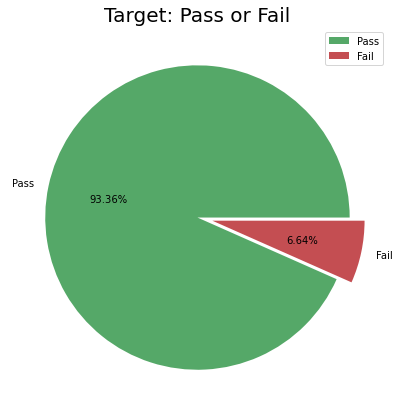

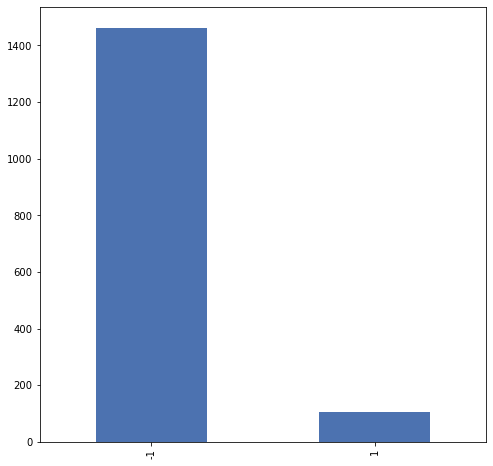

<Figure size 576x576 with 0 Axes>

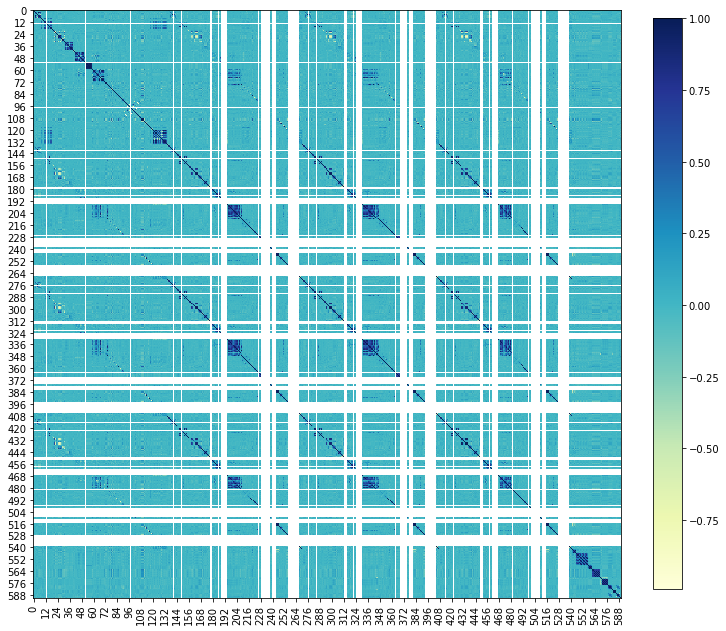

shape of x: (1567, 306)
shape of y: (1567,)
[22:35:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


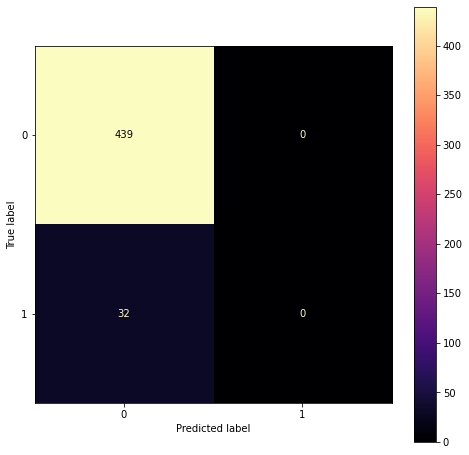

Accuracy:  0.9320594479830149


In [114]:
# 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 모델 생성 및 훈령
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix , plot_confusion_matrix

# 모델 평가 import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

# 데이터 업로드 및 정보
df = pd.read_csv("uci-secom.csv", parse_dates=["Time"])
print(df.info())
df.head()

# 가장 많은 센서 데이터 결측치 확인
missing=df.isna().sum()
missing


fig = plt.subplots(figsize=(15,7))

plt.bar(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1), missing.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1));

# 평균으로 결측치처리 - 0으로 채우기
# 신호가 없는걸로 간주하여 0으로 채우는것으로 하여 신호가 없는것으로 가정
df = df.replace(np.NaN, 0)
df.isnull().any().any()

# 파이 그래프
# 불량 분포 보기
labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

# var 차트 1/ -1
df['Pass/Fail'].value_counts().plot(kind="bar");

# 히트맵
corr_matrix = df.corr()
list_df = list(df.columns.values)
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
plt.imshow(corr_matrix, cmap='YlGnBu', interpolation = 'nearest')
plt.xticks(range(0, len(list_df), 12), rotation='vertical')
plt.yticks(range(0, len(list_df), 12))
plt.colorbar(shrink=0.8)
# plt.clim(0.1)
plt.show()

# 상관관계가 높은 일부를 찾음 예측에 도움이 되지 않지만 계산 비용만 증가시키기 때문
# 이상의 예측 변수가 높은 상관도를 가질 경우 공선성이 발생
# 공선성을 피하려면 상관도가 높거나 같은 보고 계층에 존재하는 다수의 변수를 포함 X
def remove_collinear_features(x, threshold):
  # 상관관계
  corr_matrix = x.corr()
  iters = range(len(corr_matrix.columns) - 1)
  drop_cols = []

  # 상관 행렬을 반복하고 상관관계 비교
  for i in iters:
    for j in range(i+1):
      item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
      col = item.columns
      row = item.index
      val = abs(item.values)

      # 임계값 초과하면 drop 리스트에 넣기
      if val >= threshold:
        drop_cols.append(col.values[0])

  # 드랍하기
  drops = set(drop_cols)
  x = x.drop(columns=drops)

  return x
df = remove_collinear_features(df,0.70)

# 필요없는 컬럼 지우기
df = df.drop(columns = ['Time'], axis = 1)
df.shape

# x, y 데이터 설정
x_data = df.iloc[:,:306]
y_data = df["Pass/Fail"]

print("shape of x:", x_data.shape)
print("shape of y:", y_data.shape)

# 7:3으로 나누기
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.3, random_state = 1)

# 전처리
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# XGBoost Algorithm
model = XGBClassifier(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (5, 5)
# sns.set(style = 'dark', font_scale = 1.4)
# sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
labels = ['-1', '1']
plot_confusion_matrix(model, x_test, y_test, cmap='magma')
plt.show()

print("Accuracy: ", model.score(x_test,y_test))

In [113]:
y_test

60     -1
995    -1
1469   -1
895    -1
321     1
       ..
1201   -1
718    -1
148    -1
336     1
525    -1
Name: Pass/Fail, Length: 471, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB
None


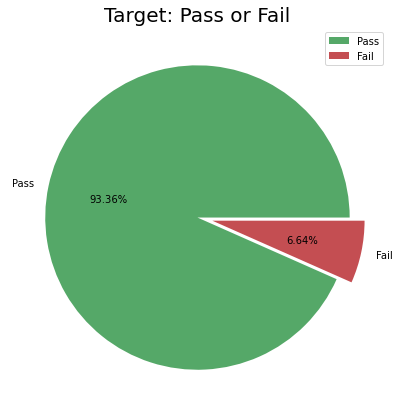

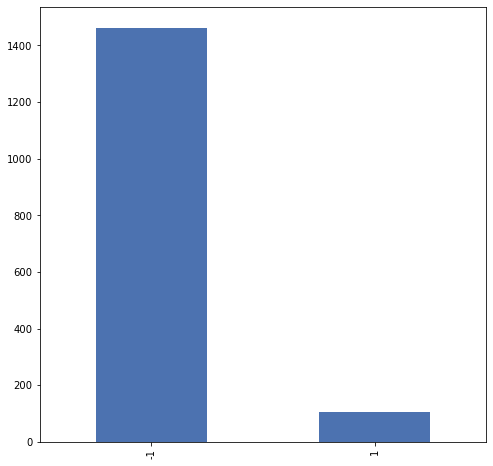

<Figure size 576x576 with 0 Axes>

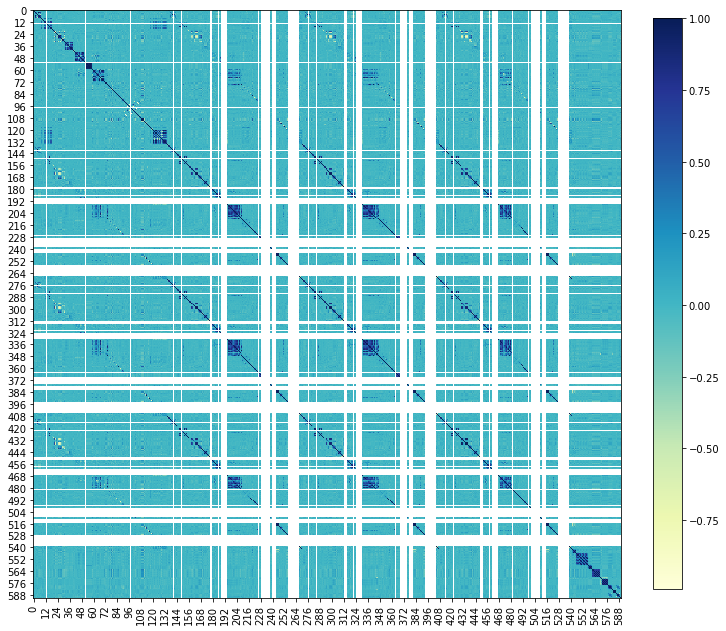

shape of x: (1567, 306)
shape of y: (1567,)
[23:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


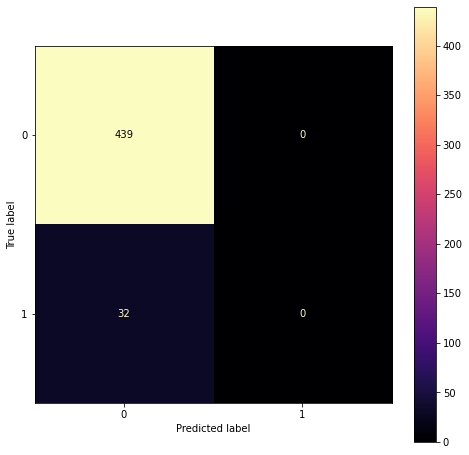

Accuracy:  0.9320594479830149


In [115]:
# 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 모델 생성 및 훈령
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix , plot_confusion_matrix

# 모델 평가 import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

# 데이터 업로드 및 정보
df = pd.read_csv("uci-secom.csv", parse_dates=["Time"])
print(df.info())
df.head()

# 가장 많은 센서 데이터 결측치 확인
missing=df.isna().sum()
missing


fig = plt.subplots(figsize=(15,7))

plt.bar(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1), missing.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1));

# 평균으로 결측치처리 - 0으로 채우기
# 신호가 없는걸로 간주하여 0으로 채우는것으로 하여 신호가 없는것으로 가정
df = df.replace(np.NaN, 0)
df.isnull().any().any()

# 파이 그래프
# 불량 분포 보기
labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

# var 차트 1/ -1
df['Pass/Fail'].value_counts().plot(kind="bar");

# 히트맵
corr_matrix = df.corr()
list_df = list(df.columns.values)
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
plt.imshow(corr_matrix, cmap='YlGnBu', interpolation = 'nearest')
plt.xticks(range(0, len(list_df), 12), rotation='vertical')
plt.yticks(range(0, len(list_df), 12))
plt.colorbar(shrink=0.8)
# plt.clim(0.1)
plt.show()


# 평균으로 결측치처리 - 0으로 채우기
# 신호가 없는걸로 간주하여 0으로 채우는것으로 하여 신호가 없는것으로 가정
df = df.replace(np.NaN, 0)
df.isnull().any().any()


# 상관관계가 높은 일부를 찾음 예측에 도움이 되지 않지만 계산 비용만 증가시키기 때문
# 이상의 예측 변수가 높은 상관도를 가질 경우 공선성이 발생
# 공선성을 피하려면 상관도가 높거나 같은 보고 계층에 존재하는 다수의 변수를 포함 X
def remove_collinear_features(x, threshold):
  # 상관관계
  corr_matrix = x.corr()
  iters = range(len(corr_matrix.columns) - 1)
  drop_cols = []

  # 상관 행렬을 반복하고 상관관계 비교
  for i in iters:
    for j in range(i+1):
      item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
      col = item.columns
      row = item.index
      val = abs(item.values)

      # 임계값 초과하면 drop 리스트에 넣기
      if val >= threshold:
        drop_cols.append(col.values[0])

  # 드랍하기
  drops = set(drop_cols)
  x = x.drop(columns=drops)

  return x
df = remove_collinear_features(df,0.70)

# 필요없는 컬럼 지우기
df = df.drop(columns = ['Time'], axis = 1)
df.shape

# x, y 데이터 설정
x_data = df.iloc[:,:306]
y_data = df["Pass/Fail"]

print("shape of x:", x_data.shape)
print("shape of y:", y_data.shape)

# 7:3으로 나누기
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.3, random_state = 1)

# 전처리
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# XGBoost Algorithm
model = XGBClassifier(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (5, 5)
# sns.set(style = 'dark', font_scale = 1.4)
# sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
plot_confusion_matrix(model, x_test, y_test, cmap='magma')
plt.show()

print("Accuracy: ", model.score(x_test,y_test))